# Spectral Estimation of Random Signals

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Introduction

In the preceding sections various statistical measures have been introduced to characterize random processes and signals. For instance the probability density function (PDF) $p_x(\theta)$, the mean value $\mu_x$, the auto-correlation function (ACF) $\varphi_{xx}[\kappa]$ and its Fourier transformation, the power spectral density (PSD) $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$. For many random processes whose internal structure is known these measures can be given in closed-form. However, for practical random signals, measures of interest have to be estimated from a limited number of samples. These estimated quantities can e.g. be used to fit a parametric model of the random process or as parameters in algorithms.

### Problem Statement

The estimation of the spectral properties of a random signal is of special interest for spectral analysis. The discrete Fourier transform (DFT) of a random signal is also random. It is not very well suited to get insights into the spectral structure of a random signal. We therefore aim at estimating the PSD $\hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of a weakly stationary and ergodic process from a limited number of samples. This is known as [*spectral (density) estimation*](https://en.wikipedia.org/wiki/Spectral_density_estimation). Many techniques have been developed for this purpose. They can be classified into

1. non-parametric and
2. parametric

techniques. Non-parametric techniques estimate the PSD of the random signal without assuming any particular structure for the generating random process. In contrary, parametric techniques assume that the generating random process can be modeled by few parameters. Their aim is to estimate these parameters in order to characterize the random signal.

### Evaluation

The estimate $\hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ can be regarded as a random signal itself. The performance of an estimator is therefore evaluated in a statistical sense. For the PSD, the following metrics are of interest

#### Bias

The [bias of an estimator](https://en.wikipedia.org/wiki/Estimator#Bias) 

$$b_{\hat{\Phi}_{xx}}  
= E\{ \hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) - \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})\}
= E\{ \hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \} - \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) $$

quantifies the difference between the estimated $\hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and the true $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$. An estimator is biased if $b_{\hat{\Phi}_{xx}} \neq 0$ and bias-free if $b_{\hat{\Phi}_{xx}} = 0$.

#### Variance

The [variance of an estimator](https://en.wikipedia.org/wiki/Estimator#Variance)

$$\sigma^2_{\hat{\Phi}_{xx}} = E \left\{ \left(\hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) - E\{ \hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})\} \right)^2 \right\}$$

quantifies its quadratic deviation from its mean value $E\{ \hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})\}$.

#### Consistency

A [consistent estimator](https://en.wikipedia.org/wiki/Estimator#Consistency) is an estimator for which the following conditions hold for a large number $N$ of samples:

1. the estimator is unbiased
    $$ \lim_{N \to \infty} b_{\hat{\Phi}_{xx}} = 0 $$

2. its variance converges towards zero
    $$ \lim_{N \to \infty} \sigma^2_{\hat{\Phi}_{xx}} = 0 $$
    
3. it convergences in probability to the true $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$
    $$ \lim_{N \to \infty} \Pr \left\{ | \hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) -  \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})| > \alpha \right\} = 0$$
    where $\alpha > 0$ denotes a (small) constant.

Consistency is a desired property of an estimator. It ensures that if the number of samples $N$ increases towards infinity, the resulting estimates converges towards the true PSD.

#### Example

The following example computes and plots the magnitude spectra $|X_n[\mu]|$ of an ensemble of random signals $x_n[k]$. In the plot, each color denotes one sample function.

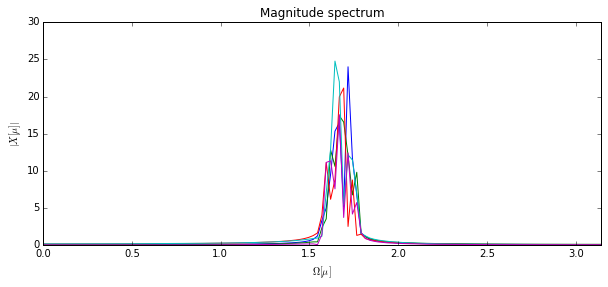

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

N = 256  # number of samples
M = 5  # number of sample functions

# generate random signal
x = np.random.normal(size=(M, N))
h = sig.firwin2(N, [0, .5, .52, .55, .57, 1], [0, 0, 1, 1, 0, 0])
x = [np.convolve(xi, h, mode='same') for xi in x]

# DFT of signal
X = np.fft.rfft(x, axis=1)
Om = np.linspace(0, np.pi, X.shape[1])

# plot signal and its spectrum
plt.figure(figsize=(10,4))
plt.plot(Om, np.abs(X.T))
plt.title('Magnitude spectrum')
plt.xlabel(r'$\Omega[\mu]$')
plt.ylabel(r'$|X[\mu]|$')
plt.axis([0, np.pi, 0, 30]);

**Exercise**

* What can you conclude on the spectral properties of the random process?
* Increase the number `N` of samples. What changes? What does not change with respect to the evaluation criteria introduced above?
* Is the DFT a consistent estimator for the spectral properties of a random process?

**Copyright**

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>